In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6'
import matplotlib.pyplot as plt
from keras import layers
from keras import models, optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/bitt/wzq

In [2]:
train_cats_dir = "./data/cats_and_dogs_small/train/cats"
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [3]:
# https://www.cnblogs.com/mengfu188/p/13561693.html
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [4]:
img_path = fnames[100]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)

In [5]:
x = x.reshape((1, ) + x.shape)

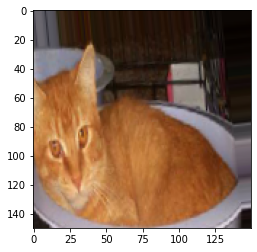

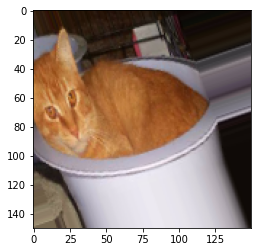

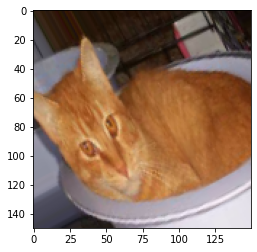

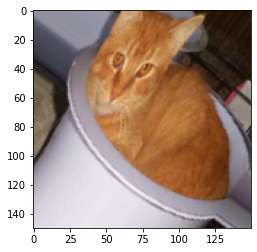

In [6]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_dir = r"/data/bitt/wzq/wzq/python-deep-learning/data/cats_and_dogs_small/train"
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
validation_dir = r"/data/bitt/wzq/wzq/python-deep-learning/data/cats_and_dogs_small/validation"
validation_generator = test_datagen.flow_from_directory(
                                                    validation_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)


Epoch 1/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6937 - acc: 0.5101 - val_loss: 0.7068 - val_acc: 0.4949
Epoch 2/100
100/100 [==============================] - 38s 379ms/step - loss: 0.6885 - acc: 0.5440 - val_loss: 0.6506 - val_acc: 0.6037
Epoch 3/100
100/100 [==============================] - 38s 376ms/step - loss: 0.6740 - acc: 0.5707 - val_loss: 0.6217 - val_acc: 0.5996
Epoch 4/100
100/100 [==============================] - 39s 390ms/step - loss: 0.6590 - acc: 0.5947 - val_loss: 0.5607 - val_acc: 0.6244
Epoch 5/100
100/100 [==============================] - 37s 366ms/step - loss: 0.6464 - acc: 0.6146 - val_loss: 0.6612 - val_acc: 0.6288
Epoch 6/100
100/100 [==============================] - 40s 402ms/step - loss: 0.6319 - acc: 0.6416 - val_loss: 0.6349 - val_acc: 0.6598
Epoch 7/100
100/100 [==============================] - 38s 377ms/step - loss: 0.6145 - acc: 0.6664 - val_loss: 0.5324 - val_acc: 0.6942
Epoch 8/100
100/100 [==========================

100/100 [==============================] - 42s 416ms/step - loss: 0.4172 - acc: 0.8150 - val_loss: 0.3590 - val_acc: 0.8022
Epoch 60/100
100/100 [==============================] - 42s 417ms/step - loss: 0.4033 - acc: 0.8125 - val_loss: 1.1555 - val_acc: 0.7919
Epoch 61/100
100/100 [==============================] - 42s 422ms/step - loss: 0.4084 - acc: 0.8131 - val_loss: 0.3741 - val_acc: 0.7854
Epoch 62/100
100/100 [==============================] - 43s 430ms/step - loss: 0.3900 - acc: 0.8220 - val_loss: 0.3146 - val_acc: 0.7703
Epoch 63/100
100/100 [==============================] - 42s 421ms/step - loss: 0.4013 - acc: 0.8125 - val_loss: 0.3836 - val_acc: 0.8312
Epoch 64/100
100/100 [==============================] - 41s 413ms/step - loss: 0.4030 - acc: 0.8210 - val_loss: 1.4140 - val_acc: 0.7964
Epoch 65/100
100/100 [==============================] - 42s 416ms/step - loss: 0.3973 - acc: 0.8285 - val_loss: 0.4153 - val_acc: 0.8141
Epoch 66/100
100/100 [==============================] 

In [14]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [15]:
epoches = range(1, len(acc)+1)

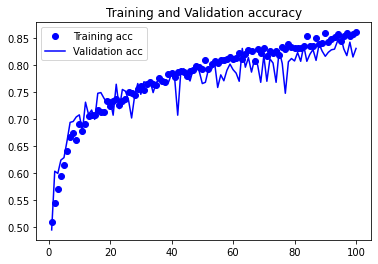

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(epoches, acc, 'bo', label='Training acc')
plt.plot(epoches, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.show()

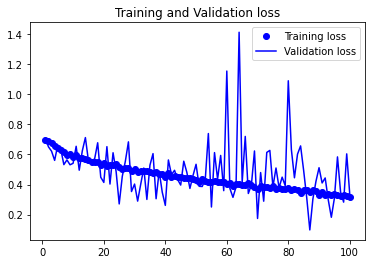

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(epoches, loss, 'bo', label='Training loss')
plt.plot(epoches, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()
plt.figure()
plt.show()